In [19]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import torch
import torch.functional as F
import torch.nn as nn
import torch.backends
import torch.utils
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import random
import os

from sklearn.metrics import accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import pycaret 
from pycaret import classification

import optuna
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
mpl.rc('font', family='Malgun Gothic')

In [21]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic=True
    torch.backends.cudnn.benchmark = True
    
seed_everything(0)

# Data Load

In [22]:
path = 'open (3)/'
df = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+'test.csv')

# Preprocessing

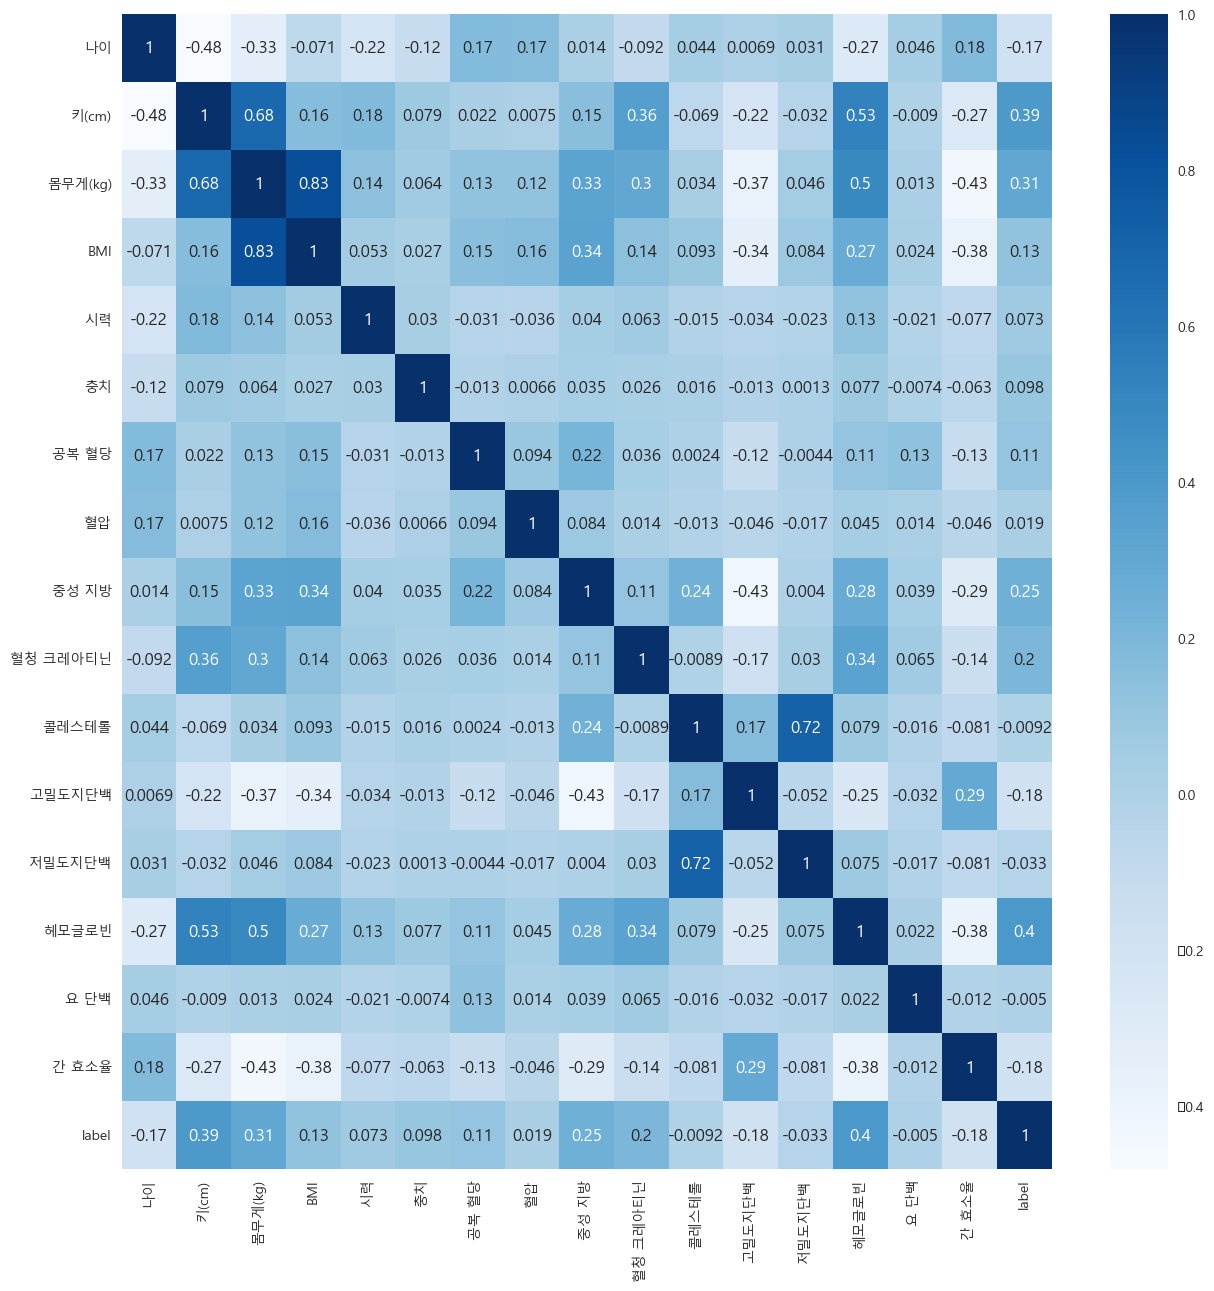

In [23]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

In [24]:
df.drop(columns = ['몸무게(kg)'], inplace=True)
test.drop(columns = ['몸무게(kg)'], inplace=True)

In [25]:
def outlier_changer(df):
    std = df.std()
    mean = df.mean()
    
    df[df>mean+(3*std)] = mean+(3*std)
    
for i in ['혈청 크레아티닌', '저밀도지단백', '중성 지방', '공복 혈당', '시력']:
    outlier_changer(df[i])

for i in ['혈청 크레아티닌', '저밀도지단백', '중성 지방', '공복 혈당', '시력']:
    outlier_changer(df[i])

In [26]:
df[['나이', '키(cm)', 'BMI', '시력', '공복 혈당', '혈압', '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈']] = StandardScaler().fit_transform(df[['나이', '키(cm)', 'BMI', '시력', '공복 혈당', '혈압', '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈']])
test[['나이', '키(cm)', 'BMI', '시력', '공복 혈당', '혈압', '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈']] = StandardScaler().fit_transform(test[['나이', '키(cm)', 'BMI', '시력', '공복 혈당', '혈압', '중성 지방', '혈청 크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈']])


In [27]:
target = df['label']
df.drop(columns='label', inplace=True)

dfid = df['ID']
df.drop(columns = 'ID', inplace=True)

testid = test['ID']
test.drop(columns = 'ID', inplace=True)

#  Model Fitting, ExtraTreesClassifier

## grid search by 'trial'

In [32]:
xtr, xte, ytr, yte = train_test_split(df, target, test_size=0.25)

In [33]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 300, 10)
    max_depth=trial.suggest_int('max_depth', 10, 100, 4)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, 1)
    bootstrap = trial.suggest_categorical('bootstrap', [False])
    
    model=ExtraTreesClassifier(n_estimators = n_estimators,
                              min_samples_split = min_samples_split,
                              max_depth = max_depth,
                              bootstrap = bootstrap,
                              random_state = 0
                              )
    
    model.fit(xtr, ytr)
    preds = model.predict(xte)
    score = accuracy_score(yte, preds)
    return score

In [34]:
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials=100)

[I 2023-08-29 00:19:35,906] A new study created in memory with name: no-name-85f89ff7-87c5-46fe-ab53-196d5134dd1e
[I 2023-08-29 00:19:36,851] Trial 0 finished with value: 0.724 and parameters: {'n_estimators': 290, 'max_depth': 18, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 0 with value: 0.724.
[I 2023-08-29 00:19:37,496] Trial 1 finished with value: 0.7154285714285714 and parameters: {'n_estimators': 140, 'max_depth': 98, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 1 with value: 0.7154285714285714.
[I 2023-08-29 00:19:37,826] Trial 2 finished with value: 0.7171428571428572 and parameters: {'n_estimators': 100, 'max_depth': 22, 'min_samples_split': 10, 'bootstrap': False}. Best is trial 1 with value: 0.7154285714285714.
[I 2023-08-29 00:19:38,186] Trial 3 finished with value: 0.7148571428571429 and parameters: {'n_estimators': 100, 'max_depth': 90, 'min_samples_split': 8, 'bootstrap': False}. Best is trial 3 with value: 0.7148571428571429.
[I 2023-08-29 0

[I 2023-08-29 00:19:50,330] Trial 37 finished with value: 0.7228571428571429 and parameters: {'n_estimators': 50, 'max_depth': 86, 'min_samples_split': 6, 'bootstrap': False}. Best is trial 10 with value: 0.6994285714285714.
[I 2023-08-29 00:19:50,432] Trial 38 finished with value: 0.7165714285714285 and parameters: {'n_estimators': 20, 'max_depth': 70, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 10 with value: 0.6994285714285714.
[I 2023-08-29 00:19:50,932] Trial 39 finished with value: 0.7205714285714285 and parameters: {'n_estimators': 140, 'max_depth': 78, 'min_samples_split': 10, 'bootstrap': False}. Best is trial 10 with value: 0.6994285714285714.
[I 2023-08-29 00:19:51,063] Trial 40 finished with value: 0.7228571428571429 and parameters: {'n_estimators': 30, 'max_depth': 54, 'min_samples_split': 7, 'bootstrap': False}. Best is trial 10 with value: 0.6994285714285714.
[I 2023-08-29 00:19:51,124] Trial 41 finished with value: 0.6994285714285714 and parameters: {'n_e

[I 2023-08-29 00:19:59,664] Trial 74 finished with value: 0.7217142857142858 and parameters: {'n_estimators': 160, 'max_depth': 66, 'min_samples_split': 5, 'bootstrap': False}. Best is trial 66 with value: 0.6965714285714286.
[I 2023-08-29 00:19:59,915] Trial 75 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 50, 'max_depth': 82, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 66 with value: 0.6965714285714286.
[I 2023-08-29 00:19:59,994] Trial 76 finished with value: 0.6994285714285714 and parameters: {'n_estimators': 30, 'max_depth': 10, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 66 with value: 0.6965714285714286.
[I 2023-08-29 00:20:00,098] Trial 77 finished with value: 0.7165714285714285 and parameters: {'n_estimators': 20, 'max_depth': 90, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 66 with value: 0.6965714285714286.
[I 2023-08-29 00:20:00,294] Trial 78 finished with value: 0.7148571428571429 and parameters: {'n_es

In [35]:
params =   {'n_estimators': 250, 'max_depth': 62, 'min_samples_split': 9, 'bootstrap': False}

In [36]:
model = ExtraTreesClassifier(**params)

model.fit(xtr, ytr)

predxtr = model.predict(xtr)
predxte = model.predict(xte)

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error

print(mae(predxtr, ytr))
print(mae(predxte, yte))

0.013904761904761904
0.2794285714285714


In [38]:
model.fit(df, target)
testpred = pd.DataFrame(model.predict(test))
testpred.columns = ['label']

### comparison with predicted 'label' and target feature

In [39]:
print(testpred['label'].mean())
print(target.mean())

0.3436666666666667
0.36728571428571427


### if gap, adjust by other models ( in this case, XGBClassifier)

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbc = XGBClassifier()

In [44]:
dtrain = xgb.DMatrix(data=xtr, label=ytr,)
dtest = xgb.DMatrix(data=xte, label=yte,)

In [41]:
parameters = {
    'learning_rate':[0.01, 0.015, 0.05, 0.1, 0.15, 0.2], 
    'min_child_weight':[0, 1, 2, 3], 
    'max_depth':[6, 9, 10, 12, 14, 15],
    'objective':['binary:logistic'],
}

In [42]:
grid_xgb = GridSearchCV(xgbc, param_grid=parameters,)

gridxgb.fit(xtr, ytr)

print(gridxgb.best_params_)

print(gridxgb.best_score_)

(시간이 많이 걸려 생략)

In [45]:
xgbcmodel = xgb.train(params = {'n_estimators': 250, 'max_depth': 62, 'min_samples_split': 9, 'bootstrap': False, 'objective':'binary:logistic', 'eval_metric':'mae'}, dtrain=dtrain)

[00:24:23] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_split", "n_estimators" } are not used.



In [48]:
xgbtr = xgbcmodel.predict(dtrain)
xgbte = xgbcmodel.predict(dtest)

In [50]:
print(mae(xgbtr, ytr))
print(mae(xgbte, yte))

0.13263791237310285
0.33841341197384256


In [49]:
dsub = xgb.DMatrix(data=test)

In [53]:
sub_xgb = pd.DataFrame(xgbcmodel.predict(dsub))

In [55]:
sub_xgb.columns = ['label']

In [56]:
sub_xgb

,label
0,0.047460
1,0.027814
2,0.508976
3,0.501484
4,0.089751
...,...
2995,0.511833
2996,0.217381
2997,0.073337
2998,0.444072


### 피처 값과 유사하게 예측 조정

In [59]:
testpred2 = testpred.copy()

In [61]:
for i in range(len(testpred)):
    if testpred2.loc[i, 'label'] == 0:
        if sub_xgb.loc[i, 'label'] >= 0.7:
            testpred2.loc[i, 'label'] = 1
            
    elif testpred2.loc[i, 'label'] == 1:
        if sub_xgb.loc[i, 'label'] < 0.2:
            testpred2.loc[i, 'label'] = 0

In [62]:
testpred2['label'].mean()

0.367

In [66]:
testpred2 = pd.concat([testid, testpred2], axis=1)
testpred2 = testpred2.set_index("ID")
testpred2.to_csv("predicted_values.csv")